In [1]:
import pyfirmata
import time

In [2]:
# associate port and board with pyFirmata    
port = '/dev/ttyUSB0'
board = pyfirmata.Arduino(port)

# use iterator thread to avoid buffer overflow
it = pyfirmata.util.Iterator(board)
it.start()

In [3]:
# define pins
sensorPin = board.get_pin('a:0:i')

In [4]:
wave = []
time_start = time.time()

t = 0.0
t_max = 20

ts = []

while t < t_max:
    
    w = sensorPin.read()
    t = time.time() - time_start
    ts.append(t)
    wave.append(w)
    
# release the board
board.exit()

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib64/python2.7/threading.py", line 804, in __bootstrap_inner
    self.run()
  File "/home/zingale/.local/lib/python2.7/site-packages/pyfirmata/util.py", line 46, in run
    while self.board.bytes_available():
  File "/home/zingale/.local/lib/python2.7/site-packages/pyfirmata/pyfirmata.py", line 256, in bytes_available
    return self.sp.inWaiting()
  File "/home/zingale/.local/lib/python2.7/site-packages/serial/serialutil.py", line 572, in inWaiting
    return self.in_waiting
  File "/home/zingale/.local/lib/python2.7/site-packages/serial/serialposix.py", line 456, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
TypeError: argument must be an int, or have a fileno() method.



In [5]:
len(wave)

15639212

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib nbagg

In [8]:
len(ts)

15639212

<IPython.core.display.Javascript object>


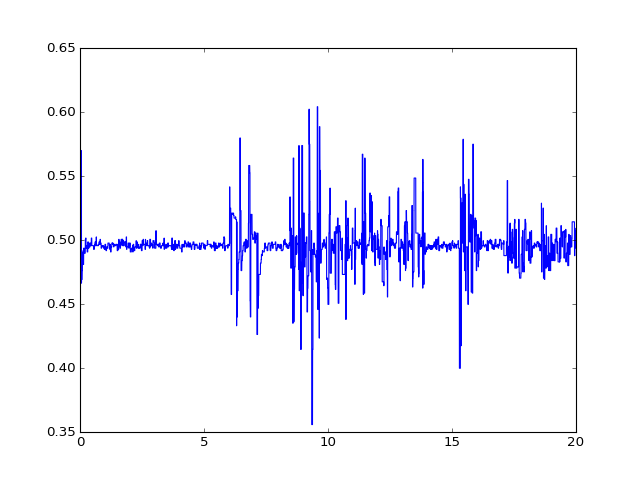

In [9]:
plt.plot(ts, wave)

In [10]:
import numpy as np

In [11]:
w = np.array(wave)

In [12]:
w.min()

0.35580000000000001

In [13]:
w.max()

0.60409999999999997